# Chapter 5 Exercise

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

1. Plot the rolling 20-day minimum of the Facebook closing price using `pandas`.

In [2]:
fb2018 = pd.read_csv('./data/fb_stock_prices_2018.csv').assign(date = lambda x: pd.to_datetime(x.date, format = '%Y-%m-%d')).set_index('date')
quakes = pd.read_csv('./data/earthquakes.csv')
covid = pd.read_csv('./data/covid19_cases.csv').assign(date = lambda x: pd.to_datetime(x.dateRep, format = '%d/%m/%Y')).set_index('date')

<AxesSubplot:xlabel='date'>

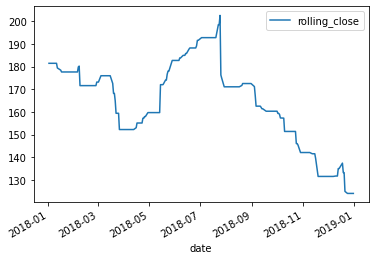

In [3]:
fb2018.assign(
    rolling_close = lambda x: x.close.rolling('20D').min()).plot(y='rolling_close')

2. Create a histogram and KDE of the change from open to close in the price of Facebook stock.

Text(0.5, 0, 'Open to Close Delta')

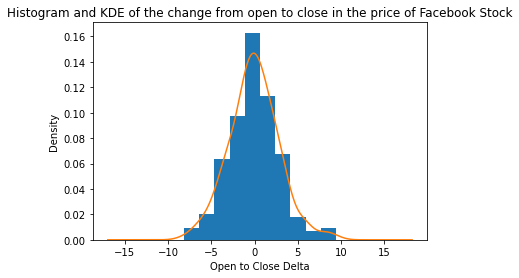

In [4]:
ax = fb2018.assign(
    openclose_delta = lambda x: x.open - x.close).openclose_delta.plot(kind='hist', density = True)

fb2018.assign(
    openclose_delta = lambda x: x.open - x.close).openclose_delta.plot(ax = ax, kind='kde', title = 'Histogram and KDE of the change from open to close in the price of Facebook Stock')
plt.xlabel('Open to Close Delta')

3. Using the earthquake data, create box plots for the magnitudes of each `magType` used in Indonesia.

mb            AxesSubplot(0.1,0.15;0.173913x0.75)
ms_20    AxesSubplot(0.308696,0.15;0.173913x0.75)
mwr      AxesSubplot(0.517391,0.15;0.173913x0.75)
mww      AxesSubplot(0.726087,0.15;0.173913x0.75)
dtype: object

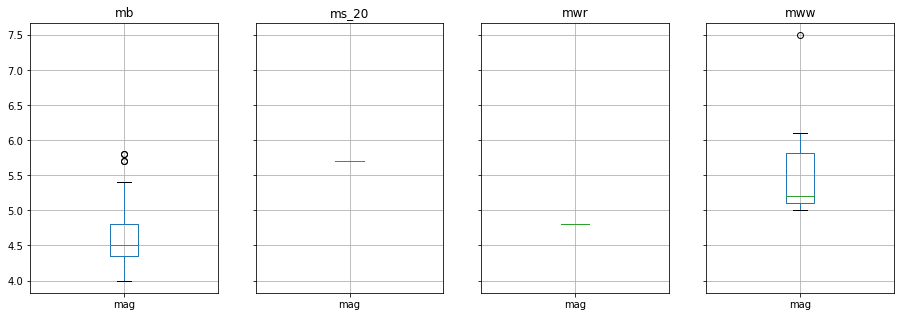

In [5]:
quakes[quakes.parsed_place == 'Indonesia'][['mag', 'magType']].groupby('magType').boxplot(figsize = (15,5), subplots = True, layout = (1,4))

4. Make a line plot of the difference between the weekly maximum high price and the weekly minimum low price for Facebook. This should be a single line.

<AxesSubplot:xlabel='date'>

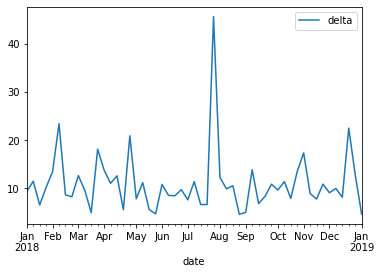

In [6]:
fb2018.resample('1W').agg({'high':'max', 'low':'min'}).assign(delta = lambda x: x.high - x.low).plot(y = 'delta')

5. Plot the 14-day moving average of the daily change in new COVID-19 cases in Brazil, China, India, Italy, Spain, and the USA:
   1. First, use the `diff()` method that was introduced in the _Working with time series data section of Chapter 4, Aggregating Pandas DataFrames_, to calculate the day-over-day change in new cases. Then, use `rolling()` to calculate the 14-day moving average.
   2. Make three subplots: one for China; one for Spain and Italy; and one for Brazil, India, and the USA.

In [7]:
covid_pivot = covid.pivot_table(index = covid.index, columns = 'countriesAndTerritories', values = 'cases').diff().rolling(15).mean()

<AxesSubplot:xlabel='date'>

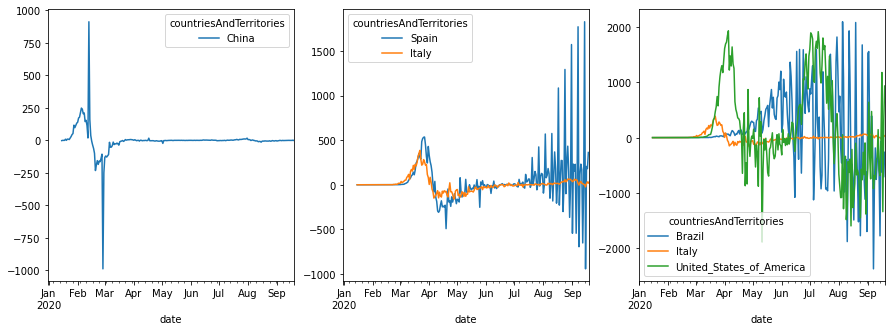

In [8]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15,5))

covid_pivot[['China']].plot(ax = axes[0])
covid_pivot[['Spain', 'Italy']].plot(ax = axes[1])
covid_pivot[['Brazil', 'Italy', 'United_States_of_America']].plot(ax = axes[2])

6. Using `matplotlib` and `pandas`, create two subplots side-by-side showing the effect that after-hours trading has had on Facebook's stock prices:
   1. The first subplot will contain a line plot of the daily difference between that day's opening price and the prior day's closing price (be sure to review the _Working with time series data section of Chapter 4, Aggregating Pandas DataFrames_, for an easy way to do this).
   2. The second subplot will be a bar plot showing the net effect this had monthly, using `resample()`.
   3. Bonus #1: Color the bars according to whether there are gains in the stock price (green) or drops in the stock price (red).
   4. Bonus #2: Modify the x-axis of the bar plot to show the three-letter abbreviation for the month.

In [9]:
shift = fb2018.assign(prior_close = lambda x: x.open -  x.close.shift())

In [10]:
shift_resample = shift[['prior_close']].resample('1M').sum()

In [17]:
['g' if x >= 0 else 'r' for x in shift_resample.prior_close]

['r', 'g', 'r', 'g', 'r', 'r', 'r', 'g', 'r', 'g', 'r', 'r']

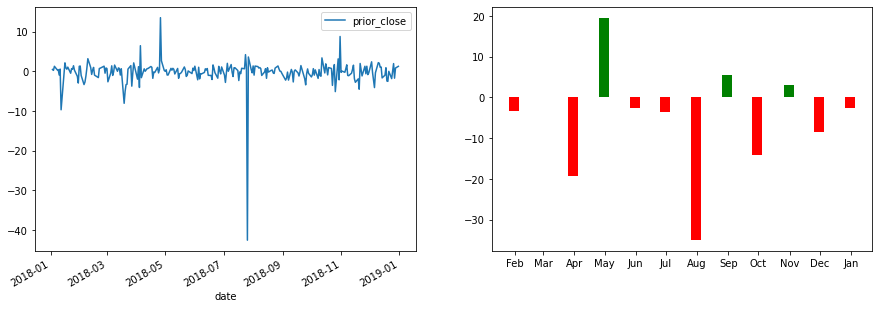

In [25]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
shift[['prior_close']].plot(ax = axes[0])
axes[1].bar(x = shift_resample.index, height = shift_resample.prior_close, width = 10, color = ['g' if x >= 0 else 'r' for x in shift_resample.prior_close])
#shift_resample.plot(ax = axes[1], kind = 'bar', width = 10, color = np.where(shift_resample > 0, 'g', 'r'))
axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
axes[1].xaxis.set_major_locator(mdates.MonthLocator(interval = 1))